# **Cars 4 You | Machine Learning Project**

### **Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

### **Import Data**

In [9]:
df = pd.read_csv('../data/train.csv')

### **Data Understanding**

In [10]:
df.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [13]:
df.isnull().sum()

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [14]:
data = ["year","mileage","tax","mpg","engineSize","paintQuality%","previousOwners"]
df[data].fillna(0).astype(int)

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners
0,2016,28421,0,11,2,63,4
1,2019,4589,145,47,1,50,1
2,2019,3624,145,40,1,56,4
3,2018,9102,145,65,1,50,-2
4,2019,1000,145,42,1,97,3
...,...,...,...,...,...,...,...
75968,2015,14480,125,53,2,78,0
75969,2013,52134,200,47,2,38,2
75970,2017,11304,145,67,1,57,3
75971,2015,69072,125,60,2,74,2


In [15]:
print(df.columns)

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')


In [16]:
# Drop NaN, convert to string, get unique values, and sort
unique_values_brands_fuel = sorted(df['fuelType'].astype(str).unique())
print(unique_values_brands_fuel)

['DIESE', 'DIESEL', 'Diese', 'Diesel', 'ETRO', 'ETROL', 'Electric', 'HYBRI', 'HYBRID', 'Hybri', 'Hybrid', 'IESE', 'IESEL', 'OTHER', 'Othe', 'Other', 'PETRO', 'PETROL', 'Petro', 'Petrol', 'YBRID', 'diese', 'diesel', 'etro', 'etrol', 'hybrid', 'iese', 'iesel', 'nan', 'other', 'petro', 'petrol', 'ther', 'ybri', 'ybrid']


In [17]:
df['fuelType'] = df['fuelType'].str.lower().replace({
    'diesel': 'diesel',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'petrol': 'petrol',
    'petro': 'petrol',
    'petro': 'petrol',
    'etrol': 'petrol',
    'electric': 'electric',
    'etro': 'electric',
    'hybrid': 'hybrid',
    'hybri': 'hybrid',
    'ybrid': 'hybrid',
    'ybri': 'hybrid',
    'other': 'other',
    'othe': 'other',
    'ther': 'other'
})

In [18]:
df['fuelType'].unique()

array(['petrol', 'diesel', 'hybrid', nan, 'other', 'electric'],
      dtype=object)

In [19]:
unique_values_brands = sorted(df['Brand'].astype(str).unique())
print(unique_values_brands)

['AUD', 'AUDI', 'Aud', 'Audi', 'BM', 'BMW', 'ERCEDES', 'FOR', 'FORD', 'For', 'Ford', 'HYUNDA', 'HYUNDAI', 'Hyunda', 'Hyundai', 'KODA', 'MERCEDE', 'MERCEDES', 'MW', 'Mercede', 'Mercedes', 'OPE', 'OPEL', 'ORD', 'OYOTA', 'Ope', 'Opel', 'PEL', 'SKOD', 'SKODA', 'Skod', 'Skoda', 'TOYOT', 'TOYOTA', 'Toyot', 'Toyota', 'UDI', 'V', 'VW', 'W', 'aud', 'audi', 'bmw', 'ercede', 'ercedes', 'for', 'ford', 'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw', 'nan', 'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda', 'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai']


In [20]:
df['Brand'] = df['Brand'].str.lower().replace({
    'aud': 'audi', 'audi': 'audi', 'udi': 'audi', 'ud': 'audi',
    'bm': 'bmw', 'mw': 'bmw',
    'mercede': 'mercedes', 'mercedes': 'mercedes', 'ercedes': 'mercedes', 'ercede': 'mercedes',
    'for': 'ford', 'ford': 'ford', 'ord': 'ford', 'or': 'ford',
    'hyunda': 'hyundai', 'hyundai': 'hyundai', 'yundai': 'hyundai', 'yunda': 'hyundai',
    'skod': 'skoda', 'skoda': 'skoda', 'koda': 'skoda', 'kod': 'skoda',
    'toyot': 'toyota', 'toyota': 'toyota', 'oyota': 'toyota',
    'ope': 'opel', 'opel': 'opel', 'pel': 'opel', 'pe': 'opel',
    'vw': 'volkswagen', 'v': 'volkswagen', 'w': 'volkswagen',
})

In [21]:
df['Brand'].unique()

array(['volkswagen', 'toyota', 'audi', 'ford', 'bmw', 'skoda', 'opel',
       'mercedes', 'hyundai', nan], dtype=object)

In [22]:
sorted(df['hasDamage'].astype(str).unique())

['0.0', 'nan']

In [23]:
print(df.columns)
#columns numeric values
##year - The year of Registration of the Car
#mileage - The total reported distance travelled by the car (in miles)
#tax -  The amount of road tax (in £) that, in 2020, was applicable to the car in question
#mpg - Average Miles per Gallon
#Size of Engine in liters (Cubic Decimeters)
# paintQuality%-  The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).
#price - The car’s price when purchased by Cars 4 You (in £).

Index(['carID', 'Brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')


In [24]:
#some of the columns include negative values which doesn't make sense in a given dataset.
#We replaced them with absolute values 

In [25]:
neg_previousOwners = (df["previousOwners"] < 0).sum()
print(f"Number of negative values: {neg_previousOwners}")

Number of negative values: 371


In [26]:
neg_previousOwners = df[df["previousOwners"] < 0]
df["previousOwners"] = df["previousOwners"].abs()

In [27]:
num_negatives = (df["mileage"] < 0).sum()
print(num_negatives)
#369 values originally
##No — in reality, the total distance a car has traveled (mileage) cannot be negative. Mileage represents how far the car has been driven, 
##and distance is always zero or positive.

369


In [28]:
negative_mileage = df[df["mileage"] < 0]
df["mileage"] = df["mileage"].abs()
#taking the absolute value of every entry in the mileage column and then replacing the original column with these values

In [29]:
num_negatives = (df["mpg"] < 0).sum()
print(num_negatives)
##36 originally

36


In [30]:
negative_mileage = df[df["mpg"] < 0]
df["mpg"] = df["mpg"].abs()

In [31]:
num_negatives = (df["engineSize"] < 0).sum()
print(num_negatives)
##84 originally

84


In [32]:
num_negatives = df[df["engineSize"] < 0]
df["engineSize"] = df["engineSize"].abs()

In [33]:
neg_tax = (df["tax"] < 0).sum()
print(neg_tax)
#378 originally

378


In [34]:
neg_tax = df[df["tax"] < 0]
df["tax"] = df["tax"].abs()

In [35]:
df_silver=df.copy()

In [36]:
#MISSING VALUES

In [37]:
##missing values - counts for each category
df_missing= pd.DataFrame(df_silver.isna().sum())

df_missing.columns= ['num_missing']
df_missing['perc_missing']= df_missing['num_missing']/df_silver.shape[0]*100
df_missing.sort_values(by='perc_missing', ascending=False)
df_missing

,num_missing,perc_missing
carID,0,0.000000
Brand,1521,2.002027
model,1517,1.996762
year,1491,1.962539
price,0,0.000000
transmission,1522,2.003343
mileage,1463,1.925684
fuelType,1511,1.988864
tax,7904,10.403696
mpg,7926,10.432654


In [38]:
df1 = df_silver.copy()

In [39]:
#Missing values - low missingness - up to 5%

from sklearn.impute import SimpleImputer
num_cols = ['year','mileage', 'engineSize', 'paintQuality%', 'previousOwners']
cat_cols = ['Brand', 'model', 'transmission', 'fuelType']
bool_cols = ['hasDamage']

# Numeric
df1[num_cols] = SimpleImputer(strategy='median').fit_transform(df1[num_cols])
# Categorical
df1[cat_cols] = df1[cat_cols].fillna('Unknown')
# Boolean
df1[bool_cols] = df1[bool_cols].fillna('Unknown') 


In [40]:
imputer = KNNImputer(n_neighbors=5)

cols_to_impute = ['tax', 'mpg'] + num_cols  # all numeric features used for KNN
imputed_array = imputer.fit_transform(df1[cols_to_impute])

# Convert back to DataFrame
df1[cols_to_impute] = imputed_array

#tax, mpg missing value is more than 10%, so we used KNNImputer because these can infer likely values from correlated features 

In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.0,37986.0,56979.00,75972.000000
year,75973.0,2017.094715,2.186964,1970.000000,2016.0,2017.0,2019.00,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.0,14699.0,20950.00,159999.000000
mileage,75973.0,23355.719689,21441.232361,1.000000,7812.0,17530.0,32433.00,323000.000000
tax,75973.0,120.926213,62.160113,0.000000,117.0,145.0,145.00,580.000000
mpg,75973.0,55.213936,15.705255,1.100000,47.1,54.3,62.78,470.800000
engineSize,75973.0,1.659165,0.567104,0.000000,1.2,1.6,2.00,6.600000
paintQuality%,75973.0,64.598878,20.809234,1.638913,47.0,65.0,82.00,125.594308
previousOwners,75973.0,2.017467,1.426193,0.000000,1.0,2.0,3.00,6.258371


In [42]:
##missing values - counts for each category
df1_missing= pd.DataFrame(df1.isna().sum())

df1_missing.columns= ['num_missing']
df1_missing['perc_missing']= df1_missing['num_missing']/df.shape[0]*100
df1_missing.sort_values(by='perc_missing', ascending=False)
df1_missing

,num_missing,perc_missing
carID,0,0.0
Brand,0,0.0
model,0,0.0
year,0,0.0
price,0,0.0
transmission,0,0.0
mileage,0,0.0
fuelType,0,0.0
tax,0,0.0
mpg,0,0.0


In [43]:
df_gold = df1.copy()

In [44]:
df_gold['paintQuality%'].unique()

array([ 63.        ,  50.        ,  56.        ,  97.        ,
        74.        ,  75.        ,  59.        ,  85.        ,
        35.        ,  68.        ,  45.        ,  30.        ,
        69.        ,  53.        ,  57.        ,  40.        ,
        60.        ,  94.        ,  33.        ,  51.        ,
        47.        ,  87.        ,  61.        ,  83.        ,
        95.        ,  46.        ,  54.        ,  80.        ,
        77.        ,  90.        ,  91.        ,  71.        ,
        44.        ,  38.        ,  64.        ,  55.        ,
        66.        ,  82.        ,  41.        ,  81.        ,
        79.        ,  72.        ,  34.        ,  88.        ,
        65.        ,  43.        ,  31.        ,  32.        ,
        96.        ,  84.        ,  70.        ,  86.        ,
        92.        ,  52.        ,  39.        ,  42.        ,
        73.        ,  78.        ,  37.        ,  93.        ,
        89.        ,  99.        ,  36.        ,  62.  

In [45]:
# If the column is numeric:
df_gold[df_gold['paintQuality%'] > 100].shape[0]
# maybe we can drop these rows? or to assume that it's 100% as cars are relatively new

367

In [46]:
df_gold[df_gold['paintQuality%'] > 100]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
171,15717,ford,Fiesta,2018.0,10491,Manual,6522.0,petrol,145.0,65.70,1.0,125.109951,3.0,0.0
194,11200,bmw,4 Series,2019.0,23591,Semi-Auto,6100.0,petrol,145.0,45.60,2.0,125.569499,2.0,0.0
272,53403,toyota,Aygo,2016.0,7995,Manual,25300.0,Unknown,0.0,69.00,1.0,125.594308,1.0,0.0
467,48038,skoda,Yeti Outdoor,2015.0,11995,Semi-Auto,19805.0,petrol,125.0,51.40,1.2,125.453599,1.0,0.0
583,10137,bmw,5 Series,2017.0,21995,Automatic,18820.0,diesel,145.0,65.70,2.0,125.569499,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74763,75768,volkswagen,Tiguan,2018.0,18499,Manual,24940.0,petrol,145.0,48.70,1.4,125.366507,0.0,0.0
75073,39666,mercedes,E Class,2017.0,21602,Semi-Auto,40690.0,diesel,145.0,56.36,3.0,125.202033,3.0,0.0
75135,23930,ford,Fiesta,2020.0,15000,Manual,35.0,petrol,145.0,56.50,1.0,125.109951,0.0,0.0
75540,38756,mercedes,GLS CLASS,2016.0,36495,Semi-Auto,33000.0,diesel,300.0,37.20,3.0,125.202033,2.0,0.0


In [47]:
#**Outliers

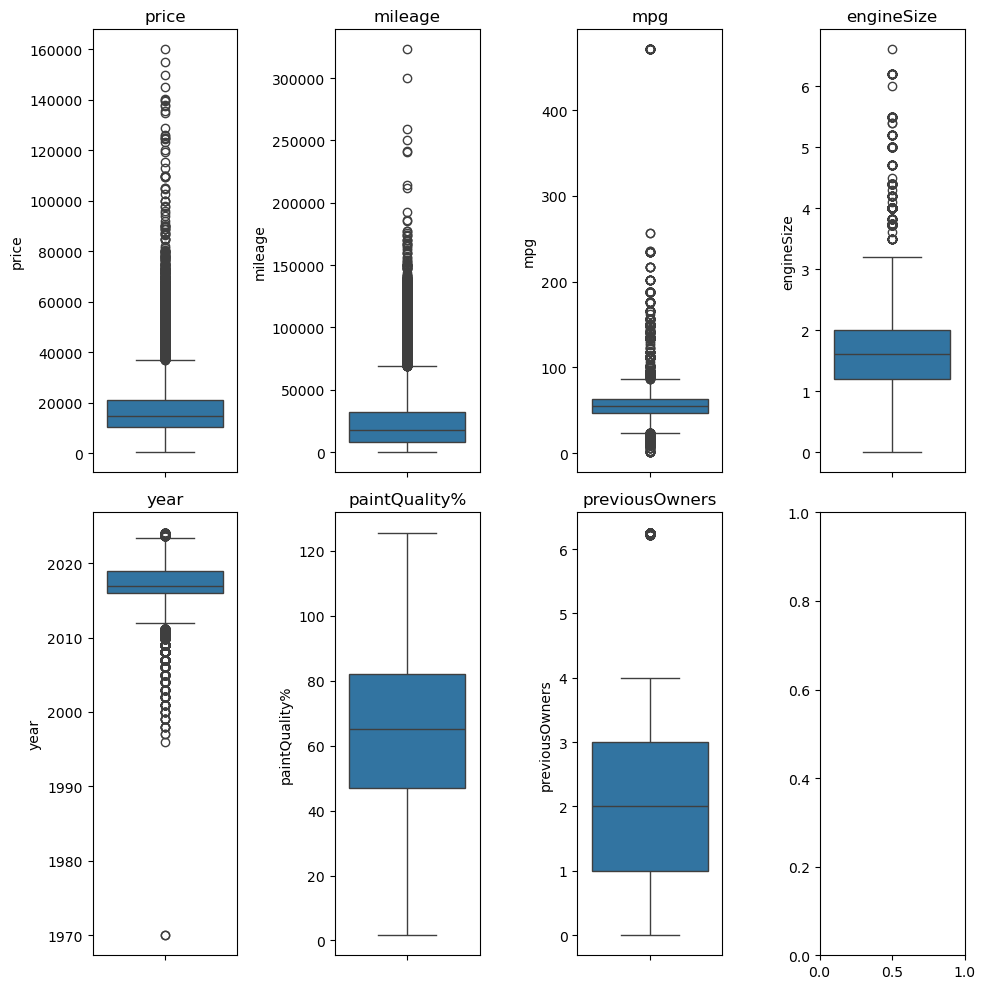

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(10, 10))
axes = axes.flatten()  # makes it a 1D array of length 6

sns.boxplot(df_gold["price"], ax=axes[0])
axes[0].set_title("price")

sns.boxplot(df_gold["mileage"], ax=axes[1])
axes[1].set_title("mileage")

sns.boxplot(df_gold["mpg"], ax=axes[2])
axes[2].set_title("mpg")

sns.boxplot(df_gold["engineSize"], ax=axes[3])
axes[3].set_title("engineSize")

sns.boxplot(df_gold["year"], ax=axes[4])
axes[4].set_title("year")

sns.boxplot(df_gold["paintQuality%"], ax=axes[5])
axes[5].set_title("paintQuality%")

sns.boxplot(df_gold["previousOwners"], ax=axes[6])
axes[6].set_title("previousOwners")

plt.tight_layout()
plt.show()


#check if tax paid somehow depend oon mileage?

In [49]:
'''1️⃣ price 

Observations: Most cars are clustered below ~40,000£, but there are numerous outliers above 50,000£, some exceeding 160,000£.
Interpretation: The dataset includes luxury or rare cars that are not typical — a right-skewed distribution.
Actionable insight:
Outliers may affect models sensitive to scale (like linear regression).
Could consider log-transforming price for regression models.
If predicting typical cars, consider capping extreme values or modeling separately.

2️⃣ mileage (miles traveled)
Observations: Majority of cars have mileage between ~5,000–50,000 miles. Some extreme high-mileage cars exceed 200,000 miles.
Interpretation: High-mileage cars are rare but present — right-skewed.
Insights:Could indicate older cars or heavy usage vehicles.
Extreme mileage outliers might distort models — consider log-transform or robust scaling.

3️⃣ mpg (Average Miles per Gallon)
Observations: Most cars cluster between 20–60 mpg, but some extreme outliers go above 400 mpg — likely data entry errors.
Insights:Values above ~100 mpg are unrealistic for standard cars → should be investigated and corrected or removed.
Could affect predictive modeling for fuel efficiency or price.

4️⃣ engineSize (liters)
Observations: Majority of engines are 1–3 liters. Outliers go beyond 5–6 liters.
Insights:Large engines (>5 L) are rare sports or luxury cars — aligns with high price outliers.
Outliers might be genuine, but check for misrecorded units.

5️⃣ year (Registration Year)
Observations: Most cars registered after 2005. Outliers below 1980, including one car around 1970.
Insights:Very old cars may be classic/collector cars → likely to have high price.
Could treat year as a numeric or categorical feature (modern vs. old cars) depending on the model.

6️⃣ paintQuality%
Observations: Values roughly span 0–125%, with most between 40–100%.
Could be a strong predictor of price or likelihood of damage.

7️⃣ previousOwners
Observations: Most cars have 1–3 previous owners. Few outliers have 6+ owners.
Insights:High owner counts are rare and could affect depreciation analysis.
Could treat as categorical or cap outliers at a reasonable max (e.g., 5).'''

'1️⃣ price \n\nObservations: Most cars are clustered below ~40,000£, but there are numerous outliers above 50,000£, some exceeding 160,000£.\nInterpretation: The dataset includes luxury or rare cars that are not typical — a right-skewed distribution.\nActionable insight:\nOutliers may affect models sensitive to scale (like linear regression).\nCould consider log-transforming price for regression models.\nIf predicting typical cars, consider capping extreme values or modeling separately.\n\n2️⃣ mileage (miles traveled)\nObservations: Majority of cars have mileage between ~5,000–50,000 miles. Some extreme high-mileage cars exceed 200,000 miles.\nInterpretation: High-mileage cars are rare but present — right-skewed.\nInsights:Could indicate older cars or heavy usage vehicles.\nExtreme mileage outliers might distort models — consider log-transform or robust scaling.\n\n3️⃣ mpg (Average Miles per Gallon)\nObservations: Most cars cluster between 20–60 mpg, but some extreme outliers go above 

In [50]:
df_outliers = df_gold.copy()

In [51]:
df_outliers[df_outliers['previousOwners'] > 4]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
259,36753,mercedes,SL CLASS,2017.0,18990,Automatic,21490.0,Unknown,145.0,70.60,2.1,84.0,6.258371,0.0
501,33222,hyundai,I30,2019.0,13498,Manual,5449.0,petrol,150.0,45.60,1.0,82.0,6.227898,0.0
543,29608,Unknown,Focus,2017.0,9798,Manual,39763.0,diesel,0.0,74.30,1.5,64.0,6.258231,Unknown
726,14926,bmw,X1,2017.0,18890,Semi-Auto,21113.0,diesel,145.0,65.70,2.0,85.0,6.230180,0.0
951,45816,mercedes,C Class,2019.0,32099,Semi-Auto,1000.0,diesel,145.0,57.56,2.0,65.0,6.258371,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74525,26589,Unknown,Fiesta,2010.0,5495,Automatic,59000.0,petrol,200.0,43.40,1.4,67.0,6.258231,0.0
74761,29629,ford,Focus,2013.0,6199,Manual,36000.0,petrol,123.0,60.40,1.0,60.0,6.258231,0.0
75295,14388,bmw,X4,2017.0,22500,Automatic,35016.0,diesel,150.0,54.30,2.0,89.0,6.230180,0.0
75301,43088,mercedes,V Class,2019.0,20750,Automatic,18625.0,diesel,145.0,48.70,2.1,75.0,6.258371,0.0


In [52]:
df_outliers[df_outliers['mpg'] > 400].shape[0]

25

In [53]:
df_outliers[df_outliers['price'] > 120000].shape[0]

18

In [54]:
df_outliers.query("year < 2000")['carID'].count() 

np.int64(15)

In [55]:
# Find indices of all outliers
indices_to_drop = df_outliers[
    (df_outliers['previousOwners'] > 4) |
    (df_outliers['mpg'] > 400) |
    (df_outliers['price'] > 120000) |
    (df_outliers['year'] < 2000)
].index

# Drop those rows
df_outliers = df_outliers.drop(indices_to_drop)


In [56]:
df_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75553.0,37992.215372,21927.597714,0.000000,19015.0,37998.0,56978.00,75972.000000
year,75553.0,2017.099004,2.159205,2000.000000,2016.0,2017.0,2019.00,2024.121759
price,75553.0,16854.217304,9557.958801,450.000000,10200.0,14698.0,20950.00,119995.000000
mileage,75553.0,23349.566787,21429.180139,1.000000,7817.0,17530.0,32419.00,323000.000000
tax,75553.0,120.914666,62.108086,0.000000,117.0,145.0,145.00,580.000000
mpg,75553.0,55.091271,13.779507,1.100000,47.1,54.3,62.74,256.800000
engineSize,75553.0,1.658968,0.564257,0.000000,1.2,1.6,2.00,6.600000
paintQuality%,75553.0,64.605032,20.803338,1.638913,47.0,65.0,82.00,125.594308
previousOwners,75553.0,1.997130,1.399104,0.000000,1.0,2.0,3.00,4.000000


In [ ]:
#Histograms of key numerical features (price, mileage, engine power, etc.).

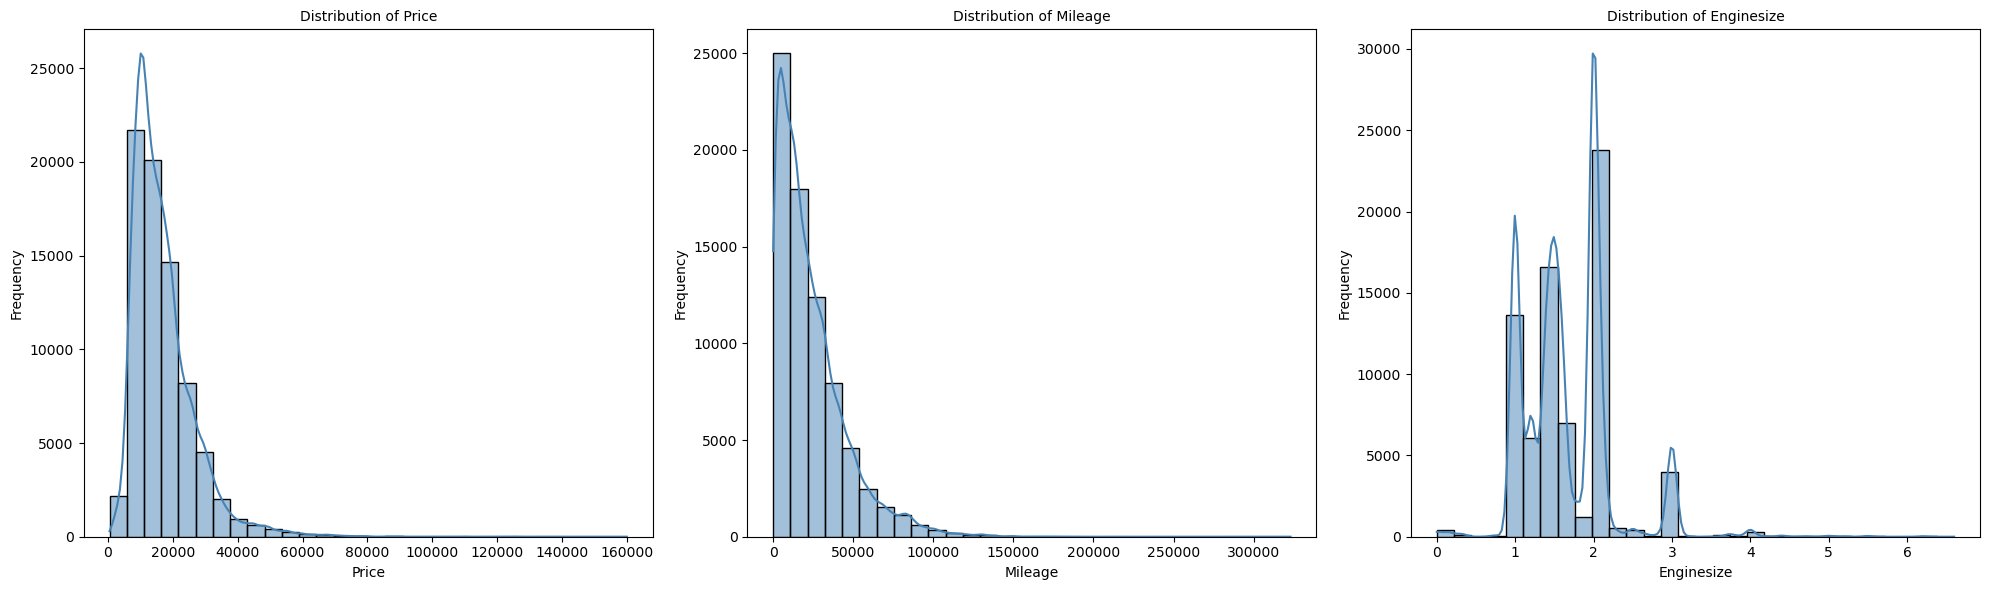

In [68]:
key_features = ['price', 'mileage', 'engineSize'] 
plt.figure(figsize=(20, 6))
#  Loop through each feature to create subplots
for i, feature in enumerate(key_features):
    plt.subplot(1, len(key_features), i + 1)
    sns.histplot(df[feature], bins=30, kde=True, color='steelblue')
    plt.title(f"Distribution of {feature.capitalize()}", fontsize=10)
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


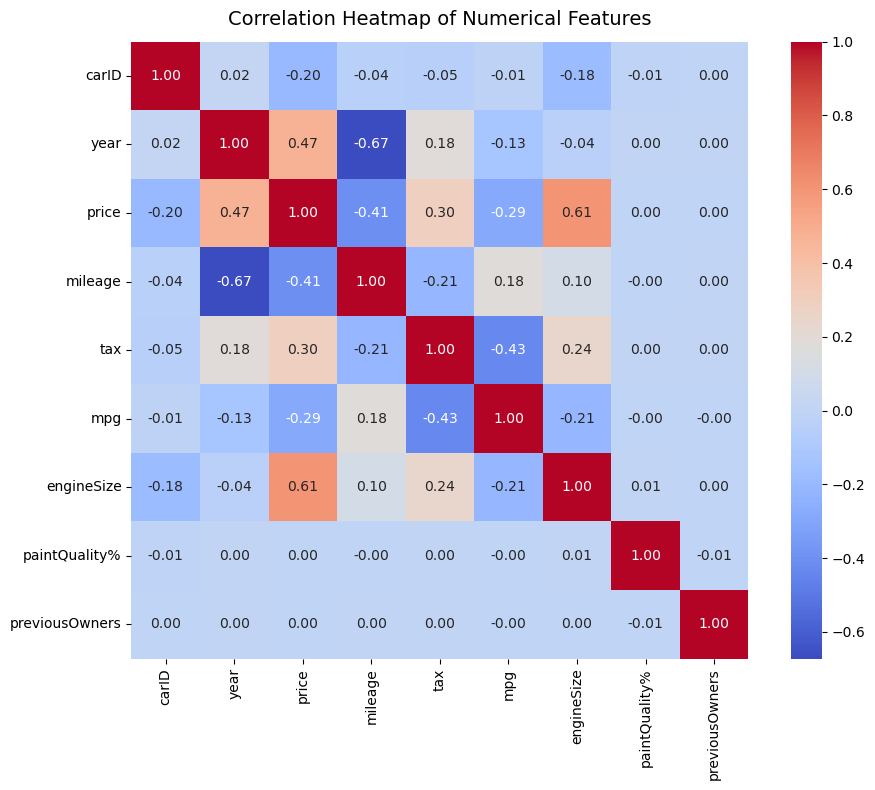

In [69]:
#only numeric columns for correlation
numeric_df = df_gold.select_dtypes(include=['int64', 'float64'])
# Computing correlation matrix ---
corr_matrix = numeric_df.corr()
# Plotting correlation heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=12)
plt.tight_layout()
plt.show()
target = 'price' 
# to identify top correlated features with the target
top_corr_features = corr_matrix[target].abs().sort_values(ascending=False).head(5).index.tolist()

In [73]:
#correlations
year & mileage	-0.67	Strong negative correlation — newer cars tend to have lower mileage, which makes intuitive sense.
price & engineSize	0.61	Strong positive correlation — larger engines are generally found in more expensive cars.
price & year	0.47	Moderate positive correlation — newer models tend to be more expensive.
price & mileage	-0.41	Moderate negative correlation — higher mileage tends to reduce car price.
mpg & engineSize	-0.43	Moderate negative correlation — cars with larger engines tend to have lower miles per gallon (less fuel efficient).


*Predictive Features for Price:*
Based on correlation strength, features that are most likely useful in predicting price are:

engineSize (strong positive)
year (positive)
mileage (negative)


*Irrelevant Features:*
Features like paintQuality%, previousOwners, and tax have very weak correlations with price. These might not contribute significantly to predictive models and could potentially be dropped or transformed.

    

SyntaxError: invalid character '—' (U+2014) (2514170630.py, line 2)

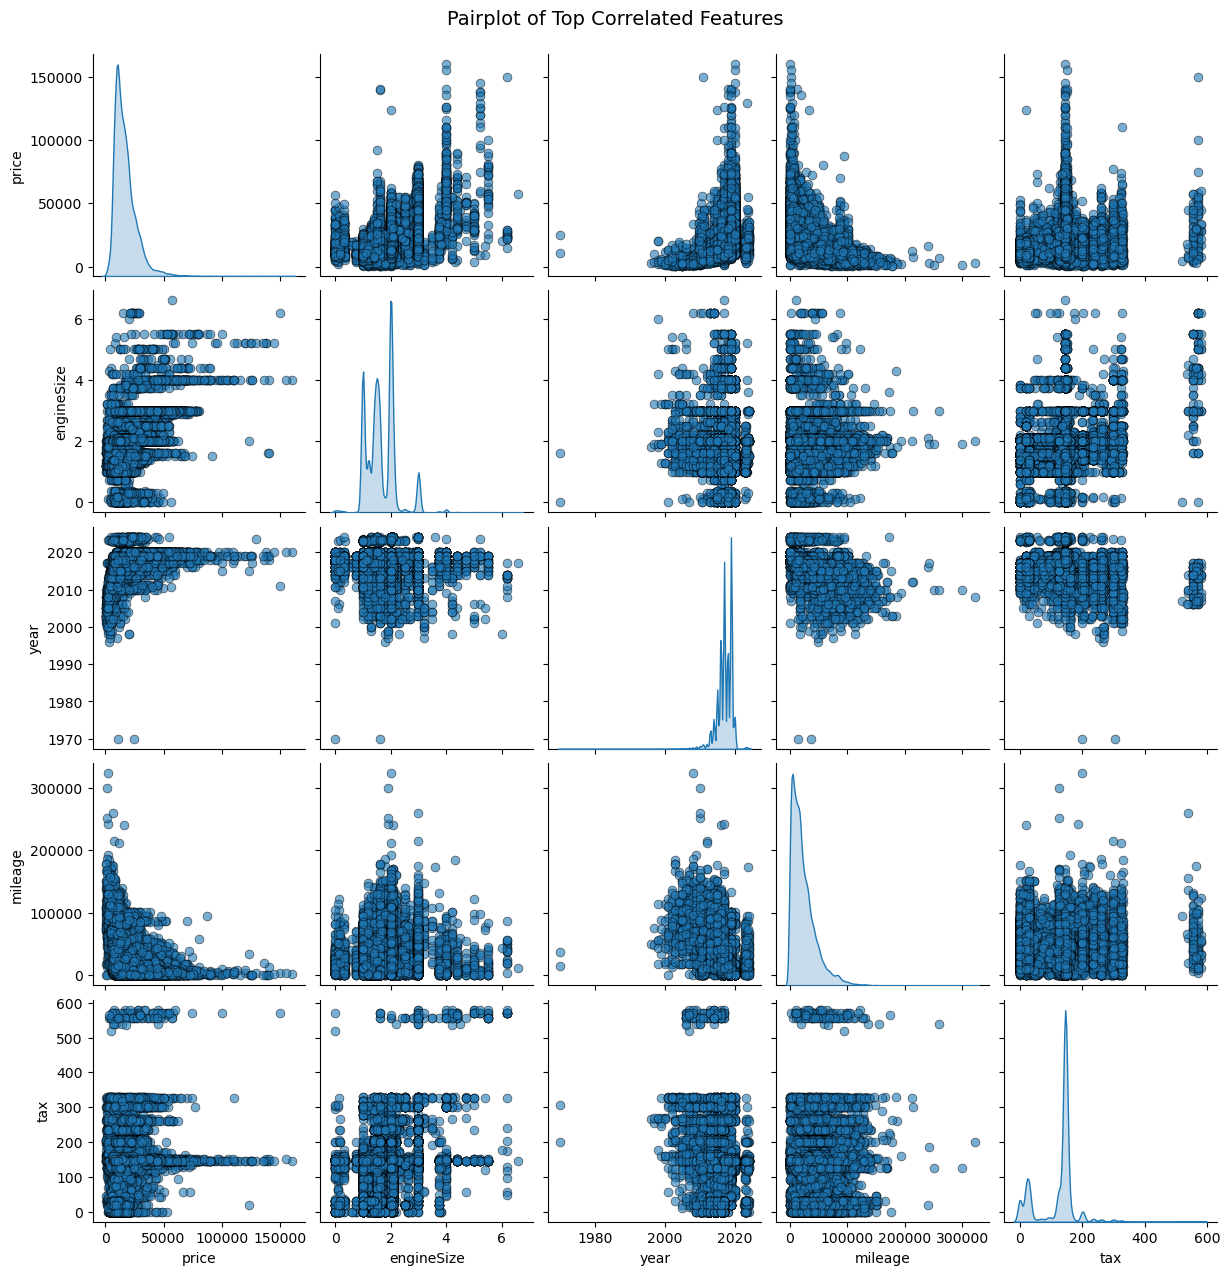

In [70]:
# a smaller DataFrame for pairplot
pairplot_df = df_gold[top_corr_features]
# Plot pairplot
sns.pairplot(pairplot_df, diag_kind="kde", plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("Pairplot of Top Correlated Features", y=1.02, fontsize=14)
plt.show()

In [ ]:
Price:
The price distribution is right-skewed, indicating that most cars are priced lower, while a smaller number of luxury vehicles have significantly higher prices.
→ Suggests potential need for log transformation to stabilize variance before regression modeling.

Engine Size:
The distribution shows distinct peaks, suggesting that certain engine sizes (e.g., 1.0L, 2.0L, 3.0L) are common, corresponding to popular car categories (compact, mid-size, large).

Year:
The data is concentrated between 2010 and 2020, implying that most records correspond to relatively modern vehicles.

Mileage:
Heavily right-skewed — most cars have lower mileage, with few very high-mileage vehicles.
This feature may benefit from normalization or a logarithmic transformation.

Tax:
The distribution is also right-skewed, suggesting that most vehicles fall into lower tax brackets, while a few are taxed significantly more (likely due to higher CO₂ emissions or engine size).

In [345]:
#DUPLICATES

In [358]:
df['carID'][df['carID'].duplicated()] #no duplicated carIDs

Series([], Name: carID, dtype: int64)

In [351]:
df_gold.duplicated().describe()

count     75973
unique        1
top       False
freq      75973
dtype: object

In [367]:
df_gold[df_gold.duplicated(keep=False)]

# no duplicates in our dataset

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage


In [129]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Suppose numeric features
numeric_features = ['price', 'engineSize', 'mileage']

# 1️⃣ Using StandardScaler
scaler = StandardScaler()
df_scaled = df_gold.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_gold[numeric_features])

# 2️⃣ Using MinMaxScaler
scaler = MinMaxScaler()
df_scaled_minmax = df_gold.copy()
df_scaled_minmax[numeric_features] = scaler.fit_transform(df_gold[numeric_features])

df_scaled_minmax

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,car_age,Brand_Tier,Brand_Tier_Encoded
0,69512,volkswagen,Golf,2016.0,0.136886,Semi-Auto,0.087988,petrol,156.0,11.417268,0.303030,63.0,4.000000,0.0,9.0,mid,1
1,53000,toyota,Yaris,2019.0,0.083611,Manual,0.014204,petrol,145.0,47.900000,0.227273,50.0,1.000000,0.0,6.0,mid,1
2,6366,audi,Q2,2019.0,0.153809,Semi-Auto,0.011217,petrol,145.0,40.900000,0.227273,56.0,4.000000,0.0,6.0,premium,2
3,29021,ford,FIESTA,2018.0,0.075525,anual,0.028177,petrol,145.0,65.700000,0.151515,50.0,2.340306,0.0,7.0,mid,1
4,10062,bmw,2 Series,2019.0,0.141305,Manual,0.003093,petrol,145.0,42.800000,0.227273,97.0,3.000000,0.0,6.0,premium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,mercedes,C Class,2015.0,0.081781,Manual,0.044827,petrol,125.0,53.300000,0.303030,78.0,0.000000,0.0,10.0,premium,2
75969,6265,audi,Q3,2013.0,0.075494,Semi-Auto,0.161403,diesel,200.0,47.900000,0.303030,38.0,2.000000,0.0,12.0,premium,2
75970,54886,toyota,Aygo,2017.0,0.049822,Automatic,0.034994,petrol,145.0,67.000000,0.151515,57.0,3.000000,0.0,8.0,mid,1
75971,860,audi,Q3,2015.0,0.078597,Manual,0.213843,diesel,125.0,60.100000,0.303030,74.0,2.000000,0.0,10.0,premium,2


In [74]:
#new features

In [76]:
# Derived Feature: Car Age
df_gold['car_age'] = 2025 - df_gold['year']

df_gold.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,car_age
0,69512,volkswagen,Golf,2016.0,22290,Semi-Auto,28421.0,petrol,156.0,11.417268,2.0,63.0,4.000000,0.0,9.0
1,53000,toyota,Yaris,2019.0,13790,Manual,4589.0,petrol,145.0,47.900000,1.5,50.0,1.000000,0.0,6.0
2,6366,audi,Q2,2019.0,24990,Semi-Auto,3624.0,petrol,145.0,40.900000,1.5,56.0,4.000000,0.0,6.0
3,29021,ford,FIESTA,2018.0,12500,anual,9102.0,petrol,145.0,65.700000,1.0,50.0,2.340306,0.0,7.0
4,10062,bmw,2 Series,2019.0,22995,Manual,1000.0,petrol,145.0,42.800000,1.5,97.0,3.000000,0.0,6.0


In [95]:
# Define reputation tiers based on your available brands
premium_brands = ['audi', 'bmw', 'mercedes']
mid_brands = ['volkswagen', 'toyota', 'ford', 'skoda']
budget_brands = ['opel', 'hyundai']
# Function to map brands to tiers
def map_brand_tier(Brand):
    if pd.isna(Brand):
        return 'unknown'
    if Brand in premium_brands:
        return 'premium'
    elif Brand in mid_brands:
        return 'mid'
    elif Brand in budget_brands:
        return 'budget'
    else:
        return 'unknown'

# Apply mapping
df_gold['Brand'].apply(map_brand_tier)

df_gold

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,car_age,Brand_Tier,Brand_Tier_Encoded
0,69512,volkswagen,Golf,2016.0,22290,Semi-Auto,28421.0,petrol,156.0,11.417268,2.0,63.0,4.000000,0.0,9.0,mid,1
1,53000,toyota,Yaris,2019.0,13790,Manual,4589.0,petrol,145.0,47.900000,1.5,50.0,1.000000,0.0,6.0,mid,1
2,6366,audi,Q2,2019.0,24990,Semi-Auto,3624.0,petrol,145.0,40.900000,1.5,56.0,4.000000,0.0,6.0,premium,2
3,29021,ford,FIESTA,2018.0,12500,anual,9102.0,petrol,145.0,65.700000,1.0,50.0,2.340306,0.0,7.0,mid,1
4,10062,bmw,2 Series,2019.0,22995,Manual,1000.0,petrol,145.0,42.800000,1.5,97.0,3.000000,0.0,6.0,premium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,mercedes,C Class,2015.0,13498,Manual,14480.0,petrol,125.0,53.300000,2.0,78.0,0.000000,0.0,10.0,premium,2
75969,6265,audi,Q3,2013.0,12495,Semi-Auto,52134.0,diesel,200.0,47.900000,2.0,38.0,2.000000,0.0,12.0,premium,2
75970,54886,toyota,Aygo,2017.0,8399,Automatic,11304.0,petrol,145.0,67.000000,1.0,57.0,3.000000,0.0,8.0,mid,1
75971,860,audi,Q3,2015.0,12990,Manual,69072.0,diesel,125.0,60.100000,2.0,74.0,2.000000,0.0,10.0,premium,2


In [98]:
df_gold['Brand_Tier'].value_counts()

Brand_Tier
mid        35373
premium    26391
budget     12688
unknown     1521
Name: count, dtype: int64

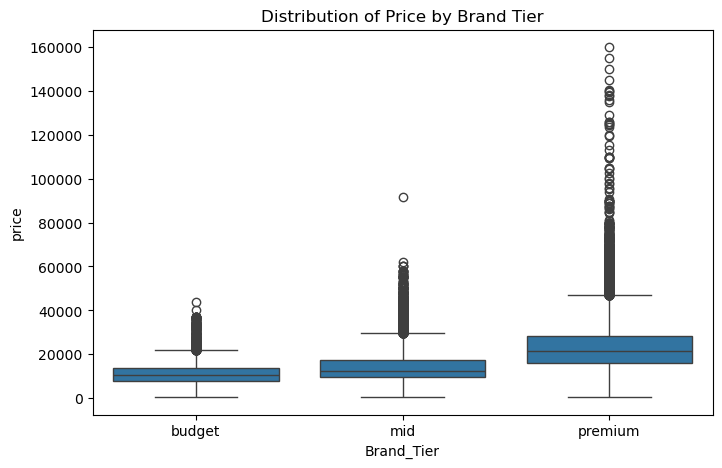

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Brand_Tier', y='price', data=df_gold, order=['budget','mid','premium'])
plt.title("Distribution of Price by Brand Tier")
plt.show()

C:\Users\ashul\AppData\Local\Temp\ipykernel_18108\3136414773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand_Tier', data=df_gold, order=['budget','mid','premium'], palette='viridis')


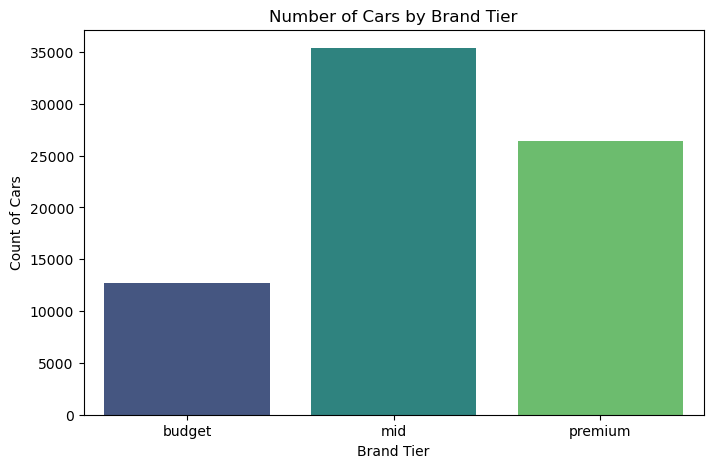

In [100]:
plt.figure(figsize=(8,5))
sns.countplot(x='Brand_Tier', data=df_gold, order=['budget','mid','premium'], palette='viridis')
plt.title("Number of Cars by Brand Tier")
plt.xlabel("Brand Tier")
plt.ylabel("Count of Cars")
plt.show()

C:\Users\ashul\AppData\Local\Temp\ipykernel_18108\2111235472.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand_Tier', y='price', data=df_gold, order=['budget','mid','premium'], ci=None, estimator=np.mean, palette='coolwarm')
C:\Users\ashul\AppData\Local\Temp\ipykernel_18108\2111235472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand_Tier', y='price', data=df_gold, order=['budget','mid','premium'], ci=None, estimator=np.mean, palette='coolwarm')


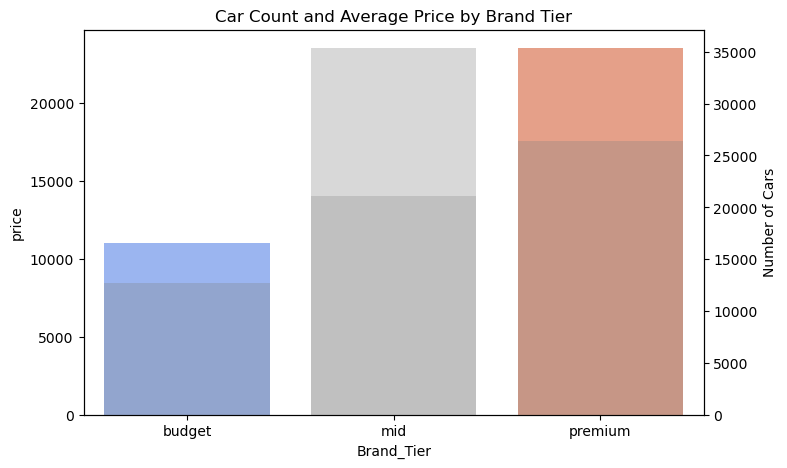

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(x='Brand_Tier', y='price', data=df_gold, order=['budget','mid','premium'], ci=None, estimator=np.mean, palette='coolwarm')
ax2 = plt.twinx()
sns.countplot(x='Brand_Tier', data=df_gold, order=['budget','mid','premium'], color='gray', alpha=0.3, ax=ax2)

plt.title("Car Count and Average Price by Brand Tier")
ax2.set_ylabel("Number of Cars")
plt.show()

In [115]:
df_visualiz = df_gold.copy()

In [119]:
cat_var = 'carID', 'Brand', 'model', 'fuelType', 'transmission'
print(cat_var) 

('carID', 'Brand', 'model', 'fuelType', 'transmission')


C:\Users\ashul\AppData\Local\Temp\ipykernel_18108\2822609989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\ashul\AppData\Local\Temp\ipykernel_18108\2822609989.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


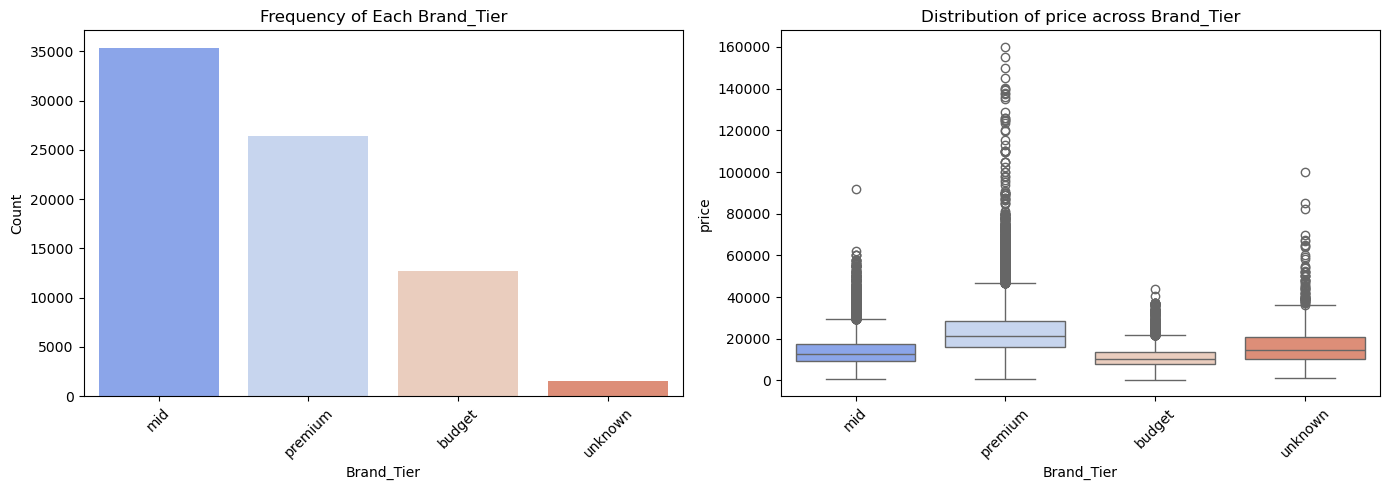

In [126]:
def visualize_categorical_relation(df_visualiz, cat_var, target_var, bins=None):
    if bins is not None:
        df_visualiz[cat_var + "_binned"] = pd.cut(df_visualiz[cat_var], bins=bins)
        cat_var = cat_var + "_binned"
        target_var = 'price'

    # --- Plot setup ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # 1️⃣ Frequency of categories
    sns.countplot(
        x=cat_var,
        data=df_visualiz,
        ax=axes[0],
        palette='coolwarm',
        order=df_visualiz[cat_var].value_counts().index
    )
    axes[0].set_title(f"Frequency of Each {cat_var}")
    axes[0].set_xlabel(cat_var)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)

    # 2️⃣ Dependent variable distribution
    sns.boxplot(
        x=cat_var,
        y=target_var,
        data=df_visualiz,
        ax=axes[1],
        palette='coolwarm',
        order=df_visualiz[cat_var].value_counts().index
    )
    axes[1].set_title(f"Distribution of {target_var} across {cat_var}")
    axes[1].set_xlabel(cat_var)
    axes[1].set_ylabel(target_var)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
visualize_categorical_relation(df_visualiz, cat_var='Brand_Tier', target_var='price')